In [15]:
import pandas as pd


In [21]:

df = pd.read_excel('myexcel.xlsx')
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [12]:
import numpy as np

df['Height'] = np.random.randint(150, 181,size=df.shape[0])

df[['Name', 'Height']].head()


,Name,Height
0,Avery Bradley,164
1,Jae Crowder,161
2,John Holland,153
3,R.J. Hunter,162
4,Jonas Jerebko,153


In [14]:

team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

team_stats = pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage (%)': team_percentage.round(2)
})

team_stats


,Employee Count,Percentage (%)
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


In [16]:

position_distribution = df['Position'].value_counts()

position_percentage = (position_distribution / len(df)) * 100

position_stats = pd.DataFrame({
    'Employee Count': position_distribution,
    'Percentage (%)': position_percentage.round(2)
})

print(position_stats)


          Employee Count  Percentage (%)
Position                                
SG                   102           22.27
PF                   100           21.83
PG                    92           20.09
SF                    85           18.56
C                     79           17.25


In [30]:

age_bins = [0, 19, 29, 39, 49, 59]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_distribution = df['Age Group'].value_counts()

predominant_age_group = age_group_distribution.idxmax()

print("Age Group Distribution:")
print(age_group_distribution)
print("Predominant Age Group:", predominant_age_group)


Age Group Distribution:
Age Group
20-29    334
30-39    119
40-49      3
<20        2
50-59      0
Name: count, dtype: int64
Predominant Age Group: 20-29


In [18]:

team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

highest_salary_team = team_salary.idxmax()
highest_salary_position = position_salary.idxmax()

print(team_salary)
print(position_salary)
print("Highest Salary Expenditure Team:", highest_salary_team)
print("Highest Salary Expenditure Position:", highest_salary_position)


Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

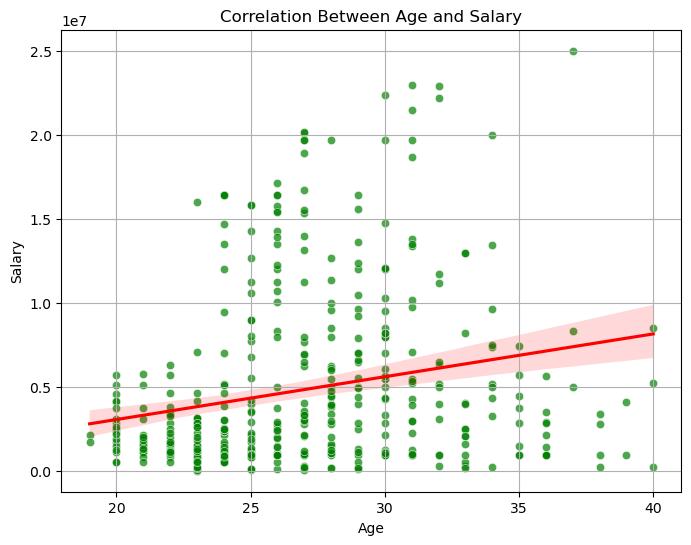

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df_filtered, alpha=0.7, color='green')
sns.regplot(x='Age', y='Salary', data=df_filtered, scatter=False, color='red')
plt.title(f"Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


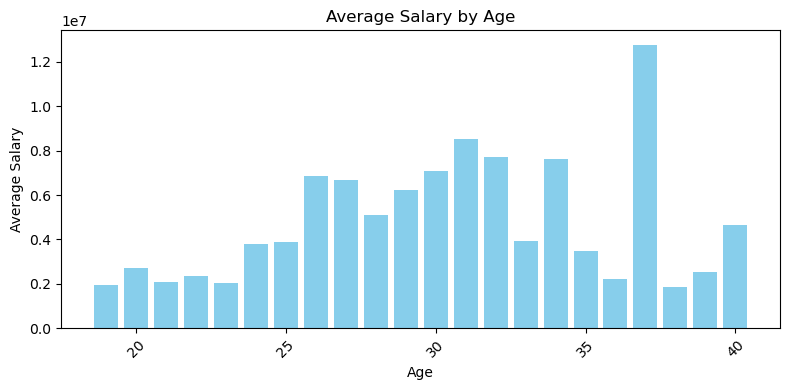

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


df['Age'] = pd.to_numeric(df['Age'])
df['Salary'] = pd.to_numeric(df['Salary'])

age_salary = df.groupby('Age')['Salary'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(age_salary['Age'], age_salary['Salary'], color='skyblue')


plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



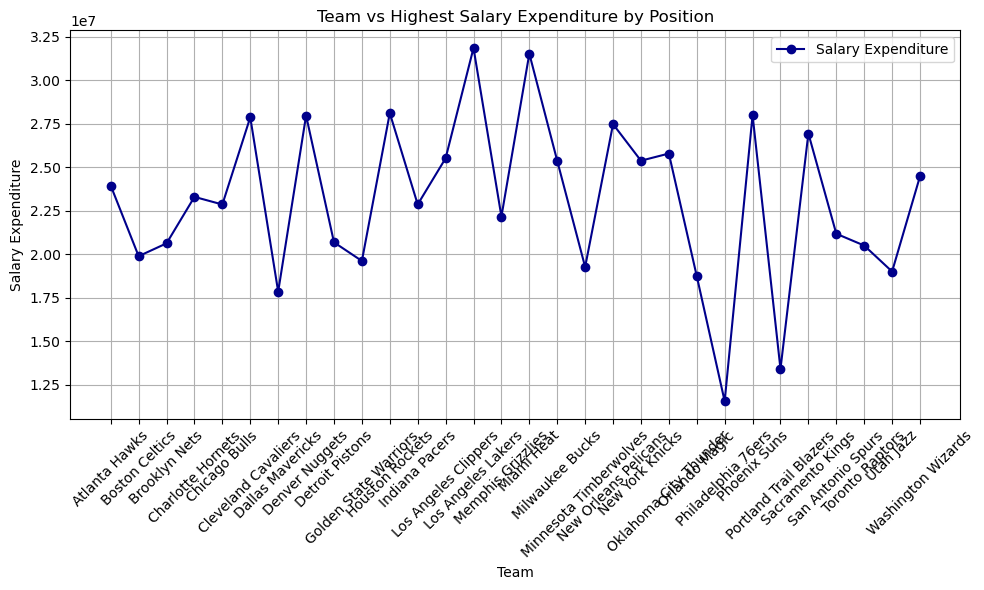

In [35]:

df['Salary'] = pd.to_numeric(df['Salary'])

team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

highest_salary_by_team = team_position_salary.loc[team_position_salary.groupby('Team')['Salary'].idxmax()]


plt.figure(figsize=(10, 6))
plt.plot(highest_salary_by_team['Team'], highest_salary_by_team['Salary'], marker='o', color='darkblue', label='Salary Expenditure')

plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.title('Team vs Highest Salary Expenditure by Position')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


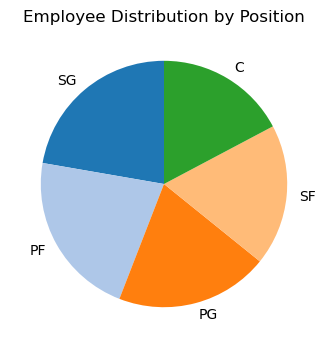

In [38]:

position_distribution = df['Position'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(
    position_distribution, 
    labels=position_distribution.index, 
 
    startangle=90, 
    colors=plt.cm.tab20.colors
)

plt.title('Employee Distribution by Position')

plt.show()


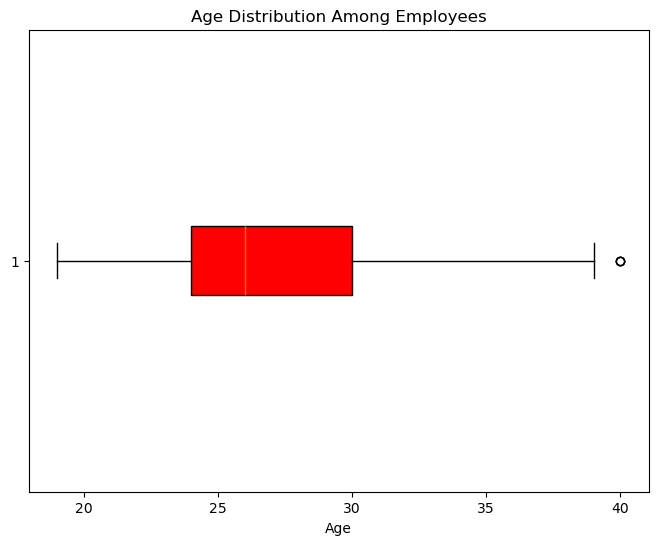

In [40]:

df['Age'] = pd.to_numeric(df['Age'])

plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="red"))

plt.xlabel('Age')
plt.title('Age Distribution Among Employees')

plt.show()
